In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Motion and Sensor Models
This seminar we will discuss some of the techniques to obtain the probabilistic models explained during the lecture.

## Task 1. 3D point model
Let's assume you have the following 3D kinematic motion model:

$$x_t = x_{t-1} + \Delta t ( u_t + \epsilon_t), \qquad \text{where }x = \left[ \begin{array}{c} x\\ y \\ z \end{array} \right], \qquad u_t = \left[ \begin{array}{c} v_x\\ v_y \\ v_z \end{array} \right], \qquad \epsilon \sim \mathcal{N}(0,R), \qquad x_{t-1} \sim \mathcal{N}(\mu_{t-1},\Sigma_{t-1})$$

Calculate the mean and covariance of the new random variable $x_t$ by using the direct derivation from the expectation operator. Send the instructors your detailed derivation.

*Hint* you may want to take a look at L05, 
You may also want to take a refresh from L02

## Task 2. Nonlinear Model
Now, let's assume we have the following non-linear model:

$$x_t = g(x_{t-1},u_t,\epsilon_t) = x_{t-1}^2 + u_t + \epsilon_t, \qquad \text{where :   } x_{t-1} \sim \mathcal{N}(\mu_{t-1} = 1,\Sigma_{t-1}=4), \qquad u_t = 0, \qquad \epsilon_t \sim \mathcal{N}(0,R)$$

Calculate the mean and covariance of the new random variable $x_t$ by using the direct derivation from the expectation operator. Send the instructors your detailed derivation.

*Hint* you may want to take a look at L05, you may also want to take a refresh from L02

# On Warping angles
Now, the following tasks are a practical approach to angles and orientations in 2D and is dedicated to the problem of wrapping angles, when it is necessary to do it and when not.

Any angle can be represented by a real value $\alpha \in \mathbb{R}$.

However, we know that by this definition, multiple values represent the same angle since $\alpha = \alpha +2\pi\cdot k$. This property of the representation (surjective) of many values mapping to the same angle is not a problem, since this angle is unique.

Now we will investigate different effects on the angles, applied to state estimation problems.

## Task 3: Open loop propagation
Given the system $x_t = x_{t-1}+u_t + \eta_t$, propagate for the sequence $u_t = 0.3$ for $t=1,\dots,100$. 

$\eta_t\sim\mathcal{N}(0,0.1)$ and $x_0\sim\mathcal{N}(0,0)$ (perfect information)

You can use the *wrap* function from PS2 (copied here below)

In [4]:
def wrap_angle(angle):
    """
    Wraps the given angle to the range [-pi, +pi].

    :param angle: The angle (in rad) to wrap (can be unbounded).
    :return: The wrapped angle (guaranteed to in [-pi, +pi]).
    """

    pi2 = 2 * np.pi

    while angle < -np.pi:
        angle += pi2

    while angle >= np.pi:
        angle -= pi2

    return angle


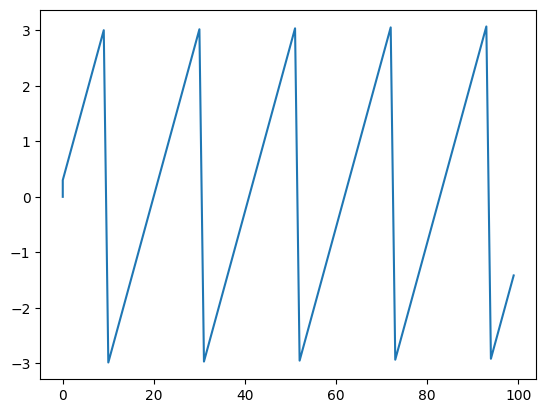

In [27]:
N = 100
x = [0]
x_gt= [0]
R = 0.01
u=np.random.randn(N)*np.sqrt(R)+0.3
time = [0]
for t in range(N):
    time.append(t)
    x_gt.append(wrap_angle(x_gt[-1]+0.3)) #this will be used later
    
    # TODO your code here for the mean propagation
    
    
plt.plot(time,x_gt,x)

plt.show()

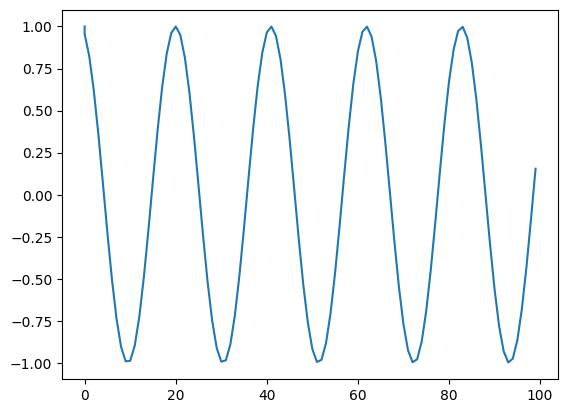

In [28]:
plt.plot(time,np.cos(x_gt), np.cos(x))
plt.show()

Q: What do you observe on the open loop mean propagation?

Q: What happens when transfroming the state variable with a cos() function?

## Task 4: Correction
we consider the observation model $p(z_t | x_t)$ and the observation function $z_t = h(x_t)+\delta_t = x_t+\delta_t, \quad \delta\sim \mathcal{N}(0,Q)$, for $Q=1$


The overeall probabilistic observation model taking into account both random varaibles is
$z_t \sim \mathcal{N}(z_t | h(x_t), H\Sigma_xH^T+Q)$, as explained in L05

You have implemented below a KF from the propagation and observations models described.

Calculate where it is necessary to **wrap** the angle and explain why. Try to achieve a correct solution in the minumum number of times and ellaborate your answer

In [29]:
Q = 1
z = x_gt[1:] + np.random.randn(N)*np.sqrt(Q)

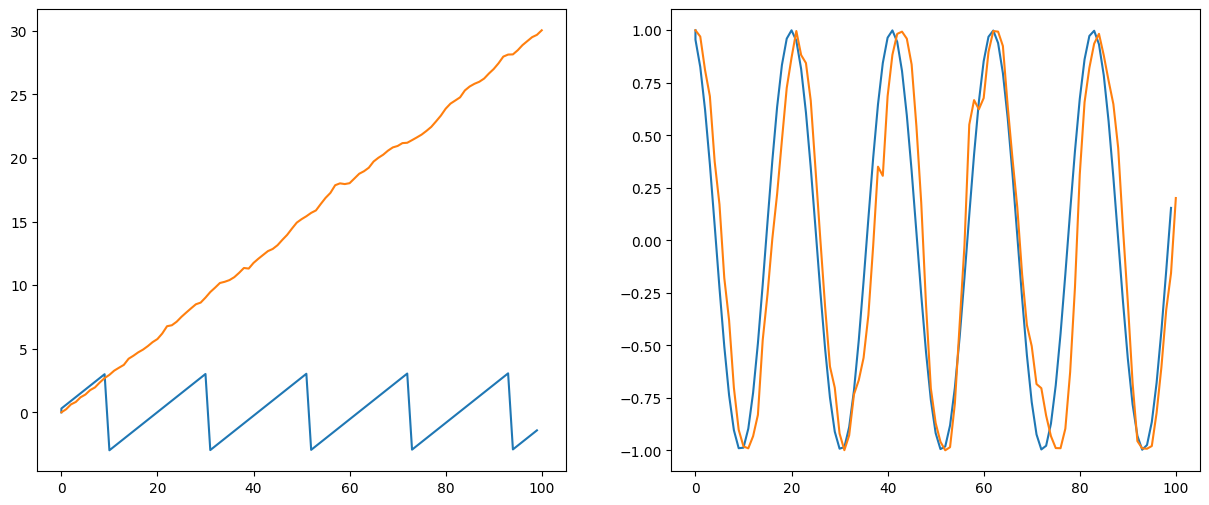

In [38]:
xp = [0]
cov = [0]
for t in range(N):
    # TODO in the following lines, use as many times as needed the wrap function
    xp.append((xp[-1]+u[t]))
    cov.append(cov[-1]+R)
    k = cov[-1] / (cov[-1] + Q)
    xp[-1] = xp[-1] + k *wrap_angle(z[t] - xp[-1])
    cov[-1] = (1 - k) * cov[-1]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(time,x_gt,xp)
plt.subplot(1,2,2)
plt.plot(time,np.cos(x_gt), np.cos(xp))
plt.show()